In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
orange_scene_img = cv.imread('oranges.jpg', cv.IMREAD_GRAYSCALE)
orange_distinct_img = cv.imread('oranges-distinct.jpg', cv.IMREAD_GRAYSCALE)

# Зображення 1

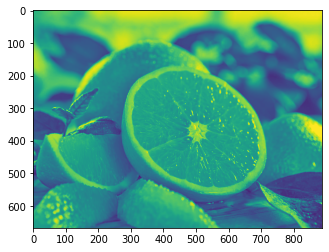

In [4]:
plt.imshow(orange_scene_img)

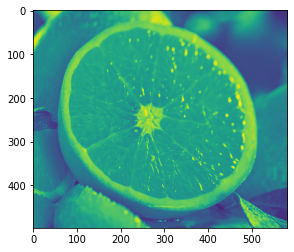

(<matplotlib.image.AxesImage at 0x7f7f70705880>, None)

In [5]:
plt.imshow(orange_distinct_img), plt.show()

In [6]:
sift_oranges = cv.SIFT_create()

In [7]:
%%time
kp1_oranges, des1_oranges = sift_oranges.detectAndCompute(orange_scene_img, None)
kp2_oranges, des2_oranges = sift_oranges.detectAndCompute(orange_distinct_img, None)

CPU times: user 670 ms, sys: 97.1 ms, total: 767 ms
Wall time: 1.18 s


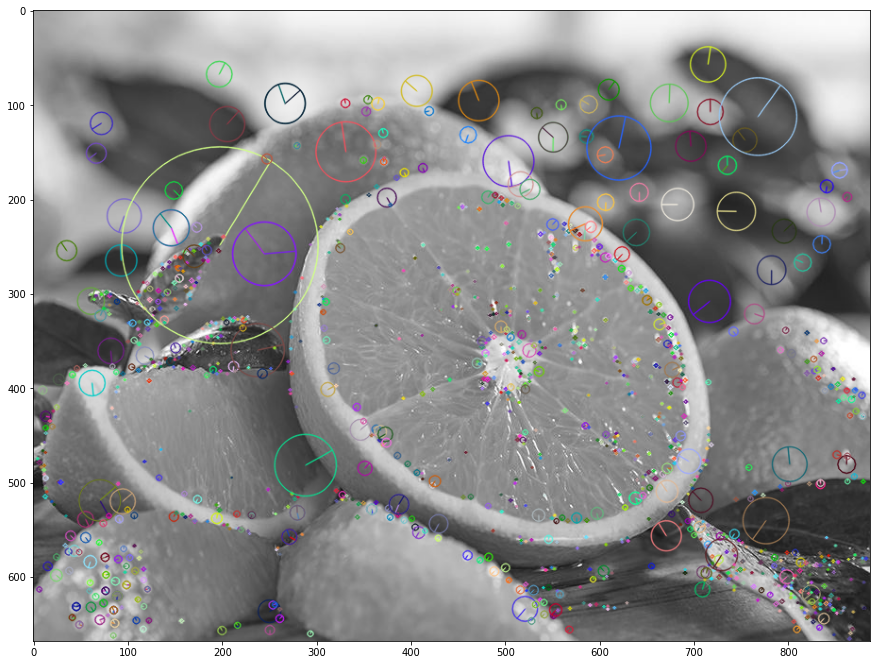

In [12]:
plt.figure(figsize = (15,15))
plt.imshow(
    cv.drawKeypoints(
        orange_scene_img, kp1_oranges,
        orange_scene_img,
        flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

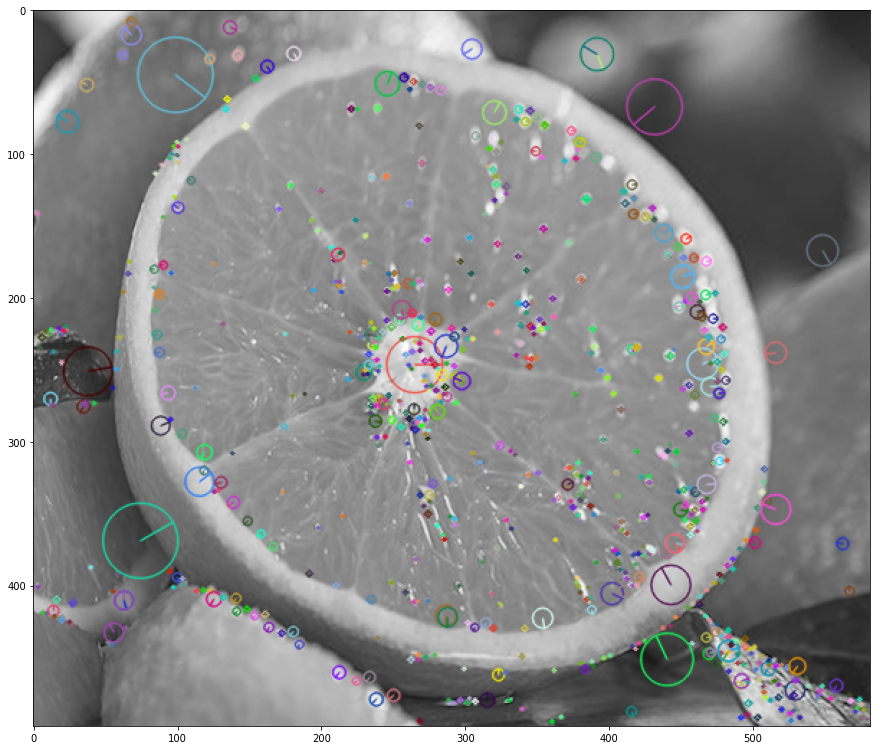

In [15]:
plt.figure(figsize = (15,15))
plt.imshow(
    cv.drawKeypoints(
        orange_distinct_img, kp2_oranges,
        orange_distinct_img,
        flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

In [18]:
bf_oranges = cv.BFMatcher()
matches_oranges = bf_oranges.knnMatch(des1_oranges, des2_oranges, k=2)

In [42]:
good_matches_oranges = []

for m, n in matches_oranges:
    if m.distance < 0.2 * n.distance:
        good_matches_oranges.append([m])

In [43]:
matches_oranges_img = cv.drawMatchesKnn(
    orange_scene_img, kp1_oranges,
    orange_distinct_img, kp2_oranges,
    good_matches_oranges,
    None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

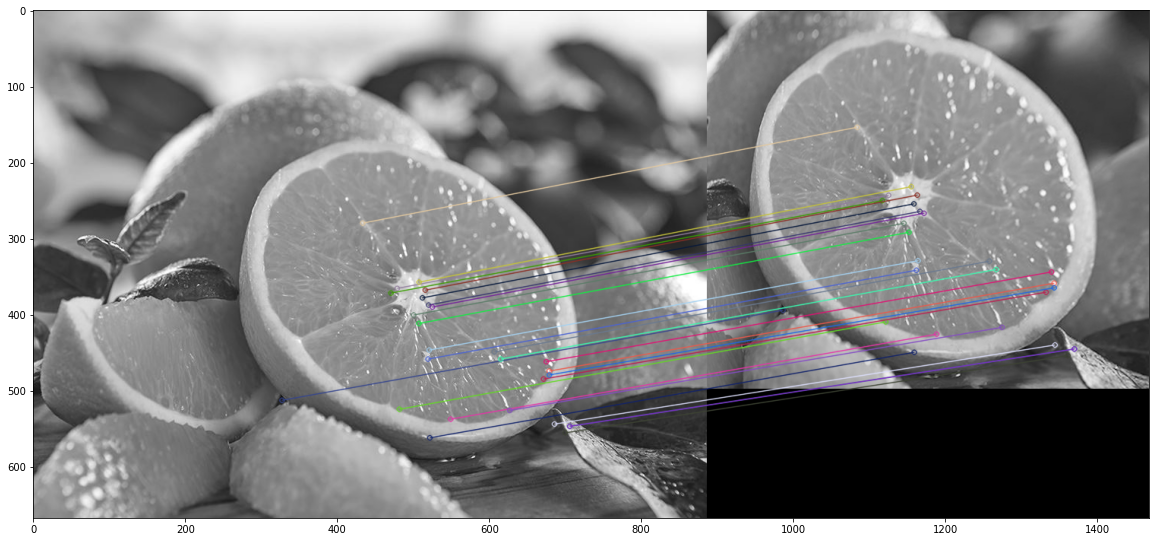

In [44]:
plt.figure(figsize = (20,20))
plt.imshow(matches_oranges_img)

# Автоматизація

In [53]:
def draw_matches(img1, img2, good_coeff=0.75):
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []

    for m, n in matches:
        if m.distance < good_coeff * n.distance:
            good_matches.append([m])
            
    matches = cv.drawMatchesKnn(
        img1, kp1,
        img2, kp2,
        good_matches,
        None,
        flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize = (20,20))
    plt.imshow(matches)

# Зображення 2

In [49]:
cat_scene_img = cv.imread('cat.jpg', cv.IMREAD_GRAYSCALE)
cat_distinct_img = cv.imread('cat-distinct.jpg', cv.IMREAD_GRAYSCALE)

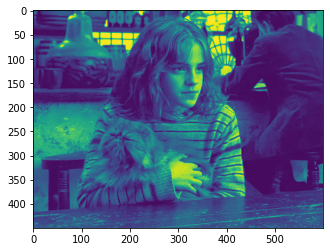

In [50]:
plt.imshow(cat_scene_img)

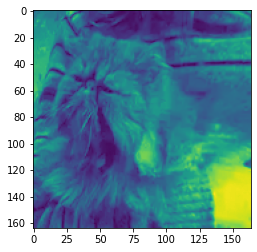

In [51]:
plt.imshow(cat_distinct_img)

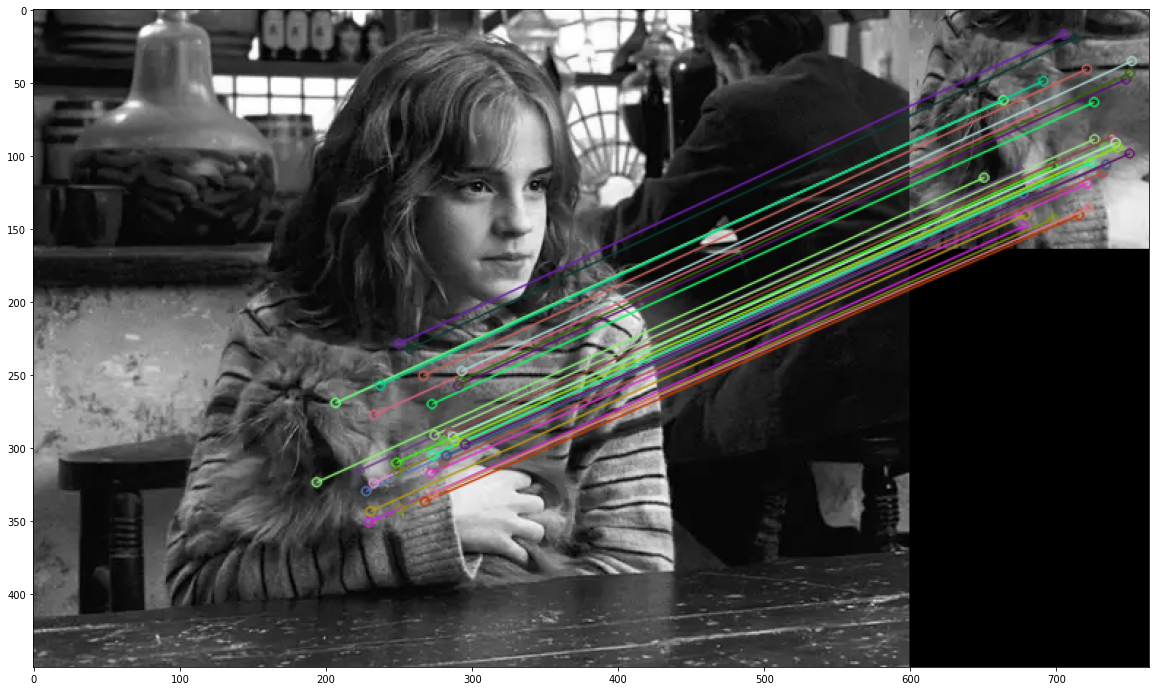

In [62]:
draw_matches(
    cat_scene_img, cat_distinct_img,
    good_coeff=0.3)